# Data Exploration

**Load the required libraries and datasets**

In [1]:
# Load the required libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore")

In [2]:
# Load the data sets  
anno_df = pd.read_csv('../data/anno_df.csv', 
                      usecols=["filename","image_id","id","defect_class_id","label","xy","x","y"])
pred_df = pd.read_csv('../data/pred_df.csv', 
                     usecols=["image_id","prediction_id","confidence","polygon_id","prediction_class","xy"])

## Explanatory Data Analysis 
### Data Inspection 

**Manual Annoted images**

In [3]:
print("Manual Annotations (anno_df):")
display(anno_df.head())

Manual Annotations (anno_df):


,filename,image_id,id,defect_class_id,label,xy,x,y
0,1g_04.png,624,175683,7,Mononukleäre Zelle,"1354,1377.48,1330.52,1389.22,1330.52,1412.699,...","[1354.0, 1330.52, 1330.52, 1350.087, 1357.913,...","[1377.48, 1389.22, 1412.699, 1424.439, 1420.52..."
1,1g_04.png,624,175664,7,Mononukleäre Zelle,"223.058,1804.029,199.578,1800.116,191.751,1815...","[223.058, 199.578, 191.751, 203.491, 223.058, ...","[1804.029, 1800.116, 1815.769, 1831.422, 1835...."
2,1g_04.png,624,175634,7,Mononukleäre Zelle,"1549.665,1005.717,1545.751,1013.543,1541.838,1...","[1549.665, 1545.751, 1541.838, 1541.838, 1557....","[1005.717, 1013.543, 1021.37, 1037.023, 1037.0..."
3,1g_04.png,624,175654,7,Mononukleäre Zelle,"661.347,1678.803,637.867,1667.064,614.387,1674...","[661.347, 637.867, 614.387, 622.214, 630.04, 6...","[1678.803, 1667.064, 1674.89, 1698.37, 1694.45..."
4,1g_04.png,624,175633,7,Mononukleäre Zelle,"1784.462,1897.948,1796.202,1886.208,1804.029,1...","[1784.462, 1796.202, 1804.029, 1780.549, 1772....","[1897.948, 1886.208, 1870.555, 1858.815, 1862...."


In [4]:
print(anno_df.info())
anno_df.describe(include='int64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   filename         3648 non-null   object
 1   image_id         3648 non-null   int64 
 2   id               3648 non-null   int64 
 3   defect_class_id  3648 non-null   int64 
 4   label            3648 non-null   object
 5   xy               3648 non-null   object
 6   x                3648 non-null   object
 7   y                3648 non-null   object
dtypes: int64(3), object(5)
memory usage: 228.1+ KB
None


,image_id,id,defect_class_id
count,3648.000000,3.648000e+03,3648.0
mean,1952.283717,9.417104e+05,7.0
std,831.767822,5.353460e+05,0.0
min,624.000000,1.686410e+05,7.0
25%,1455.000000,4.049428e+05,7.0
50%,2021.000000,1.043308e+06,7.0
75%,2862.000000,1.358439e+06,7.0
max,3165.000000,1.870170e+06,7.0


**System Predictions Dataset**

In [5]:
print("\nSystem Predictions (pred_df):")
display(pred_df.head())


System Predictions (pred_df):


,image_id,prediction_id,confidence,polygon_id,prediction_class,xy
0,3165,23699,0.431523,1937097,Defect,"37.578460693359375,13.887542724609375,37.31016..."
1,3165,23699,0.603884,1937098,Defect,"231.45407104492188,9.646164820744442,225.45407..."
2,3165,23699,0.244653,1937099,Defect,"318.3146711077009,33.736045837402344,316.76688..."
3,3165,23699,0.916268,1937100,Defect,"395.9158020019531,82.97906857445126,387.915802..."
4,3165,23699,0.366087,1937101,Defect,"337.0517883300781,84.71218928584346,332.051788..."


In [6]:
print(pred_df.info())
pred_df.describe(include=['int64', 'float64'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7118 entries, 0 to 7117
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   image_id          7118 non-null   int64  
 1   prediction_id     7118 non-null   int64  
 2   confidence        7118 non-null   float64
 3   polygon_id        7118 non-null   int64  
 4   prediction_class  7118 non-null   object 
 5   xy                7118 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 333.8+ KB
None


,image_id,prediction_id,confidence,polygon_id
count,7118.000000,7118.000000,7118.000000,7.118000e+03
mean,1951.781540,23720.931863,0.512246,1.940022e+06
std,813.485715,14.282011,0.302539,2.054934e+03
min,624.000000,23699.000000,0.100062,1.936463e+06
25%,1455.000000,23707.000000,0.218224,1.938242e+06
50%,2021.000000,23721.000000,0.468183,1.940022e+06
75%,2324.000000,23732.000000,0.820323,1.941801e+06
max,3165.000000,23746.000000,0.990468,1.943580e+06


**Check for missing values**

In [7]:
# Missing values in `anno_df`
anno_df.isna().sum()

filename           0
image_id           0
id                 0
defect_class_id    0
label              0
xy                 0
x                  0
y                  0
dtype: int64

In [8]:
# Missing values in `anno_df`
pred_df.isna().sum()

image_id            0
prediction_id       0
confidence          0
polygon_id          0
prediction_class    0
xy                  0
dtype: int64

No Missing values in both data sets 

**Check for duplicated records**

In [9]:
anno_df.duplicated().sum()

np.int64(0)

In [10]:
pred_df.duplicated().sum()

np.int64(0)

No duplicated entries in both datasets 

**Drop Unary columns**

In [11]:
def drop_unary_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Drops columns from the DataFrame that contain only a single unique value.
    """
    return df.loc[:, df.nunique() > 1]

Manual dataset 

In [12]:
anno_df = drop_unary_columns(anno_df)

# Check the resultant dataframe
anno_df.head()

,filename,image_id,id,xy,x,y
0,1g_04.png,624,175683,"1354,1377.48,1330.52,1389.22,1330.52,1412.699,...","[1354.0, 1330.52, 1330.52, 1350.087, 1357.913,...","[1377.48, 1389.22, 1412.699, 1424.439, 1420.52..."
1,1g_04.png,624,175664,"223.058,1804.029,199.578,1800.116,191.751,1815...","[223.058, 199.578, 191.751, 203.491, 223.058, ...","[1804.029, 1800.116, 1815.769, 1831.422, 1835...."
2,1g_04.png,624,175634,"1549.665,1005.717,1545.751,1013.543,1541.838,1...","[1549.665, 1545.751, 1541.838, 1541.838, 1557....","[1005.717, 1013.543, 1021.37, 1037.023, 1037.0..."
3,1g_04.png,624,175654,"661.347,1678.803,637.867,1667.064,614.387,1674...","[661.347, 637.867, 614.387, 622.214, 630.04, 6...","[1678.803, 1667.064, 1674.89, 1698.37, 1694.45..."
4,1g_04.png,624,175633,"1784.462,1897.948,1796.202,1886.208,1804.029,1...","[1784.462, 1796.202, 1804.029, 1780.549, 1772....","[1897.948, 1886.208, 1870.555, 1858.815, 1862...."


In [13]:
pred_df = drop_unary_columns(pred_df)

# Check for the resultant dataframe 
pred_df.head()

,image_id,prediction_id,confidence,polygon_id,xy
0,3165,23699,0.431523,1937097,"37.578460693359375,13.887542724609375,37.31016..."
1,3165,23699,0.603884,1937098,"231.45407104492188,9.646164820744442,225.45407..."
2,3165,23699,0.244653,1937099,"318.3146711077009,33.736045837402344,316.76688..."
3,3165,23699,0.916268,1937100,"395.9158020019531,82.97906857445126,387.915802..."
4,3165,23699,0.366087,1937101,"337.0517883300781,84.71218928584346,332.051788..."


Check if two columns; `image_id` and `filename` match. Such that the each image id goes with each of the filename


In [14]:
# Check if each image_id uniquely matches a filename
image_id_to_filename = anno_df.groupby('image_id')['filename'].nunique()
filename_to_image_id = anno_df.groupby('filename')['image_id'].nunique()

# Print results
print("Unique filenames per image_id:")
print(image_id_to_filename.value_counts())

print("\nUnique image_ids per filename:")
print(filename_to_image_id.value_counts())

# Check for mismatches
if (image_id_to_filename > 1).any() or (filename_to_image_id > 1).any():
    print("Warning: There are image_ids associated with multiple filenames or vice versa.")
else:
    print("Each image_id uniquely matches a filename and vice versa.")

Unique filenames per image_id:
filename
1    48
Name: count, dtype: int64

Unique image_ids per filename:
image_id
1    48
Name: count, dtype: int64
Each image_id uniquely matches a filename and vice versa.


### Data Visualization

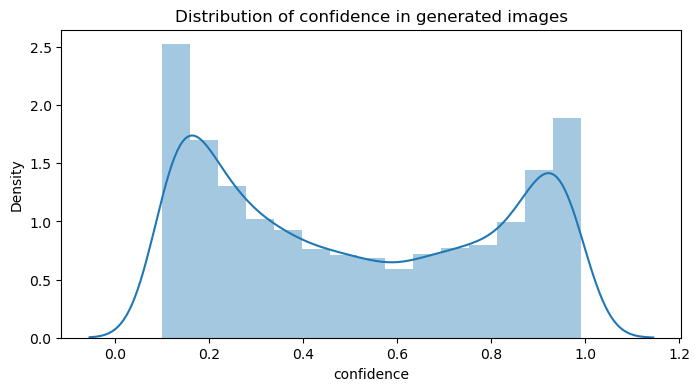

In [15]:
# Class distribution (example for 'label' column)
plt.figure(figsize=(8,4))
sns.distplot(pred_df["confidence"])
plt.title('Distribution of confidence in generated images')
# plt.xticks(rotation=45)
plt.show()

The distribution of the generated images is binomial. The extreme cases lead where there are more instances of very low and high confidence compared to the moderate confidence

In [16]:
anno_df["x"][0]

'[1354.0, 1330.52, 1330.52, 1350.087, 1357.913, 1365.74, 1365.74]'

In [17]:
anno_df["y"][0]

'[1377.48, 1389.22, 1412.699, 1424.439, 1420.526, 1408.786, 1397.046]'

In [18]:
anno_df["xy"][0]

'1354,1377.48,1330.52,1389.22,1330.52,1412.699,1350.087,1424.439,1357.913,1420.526,1365.74,1408.786,1365.74,1397.046'

In [19]:
pred_df["xy"][0]

'37.578460693359375,13.887542724609375,37.31016801043255,21.325042724609375,41.03679402669271,31.325042724609375,48.578460693359375,38.22826853106099,58.578460693359375,39.41595181551847,65.34316657571232,36.325042724609375,72.57846069335938,29.00686090642756,71.57846069335938,16.73680743049173,63.578460693359375,10.758376057942709,47.578460693359375,9.022717143214026,40.578460693359375,10.389558853641633,37.578460693359375,13.887542724609375'

**Defect Location Heatmaps** 

Plot the (x, y) coordinates of defects on a representative image or grid to visualize spatial clustering or annotation density.

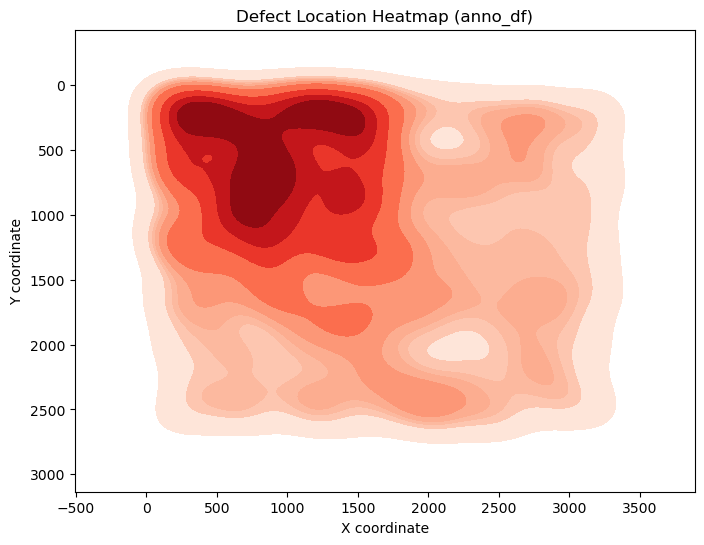

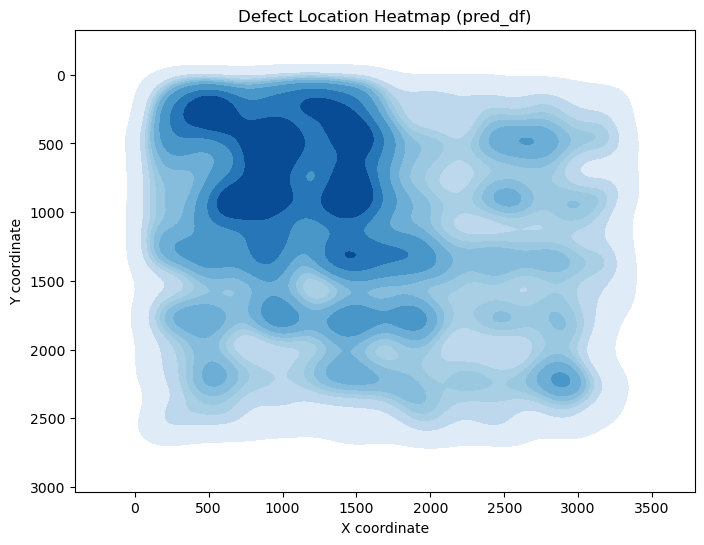

In [20]:
def extract_xy_coords(xy_str):
    """Parse the xy string into separate x and y lists."""
    coords = [float(val) for val in xy_str.split(',')]
    x_coords = coords[::2]
    y_coords = coords[1::2]
    return x_coords, y_coords

def get_all_coords(df):
    """Aggregate all x and y coordinates from the dataframe."""
    all_x, all_y = [], []
    for xy_str in df['xy']:
        x, y = extract_xy_coords(xy_str)
        all_x.extend(x)
        all_y.extend(y)
    return np.array(all_x), np.array(all_y)

# For anno_df
anno_x, anno_y = get_all_coords(anno_df)

plt.figure(figsize=(8, 6))
sns.kdeplot(x=anno_x, y=anno_y, cmap="Reds", fill=True, thresh=0.05)
plt.title("Defect Location Heatmap (anno_df)")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.gca().invert_yaxis()  # Optional: match image coordinate system
plt.show()

# For pred_df
pred_x, pred_y = get_all_coords(pred_df)
plt.figure(figsize=(8, 6))
sns.kdeplot(x=pred_x, y=pred_y, cmap="Blues", fill=True, thresh=0.05)
plt.title("Defect Location Heatmap (pred_df)")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.gca().invert_yaxis()
plt.show()

The defects are most concentrated at the top-left quarter of the images for both the manually and the generated images

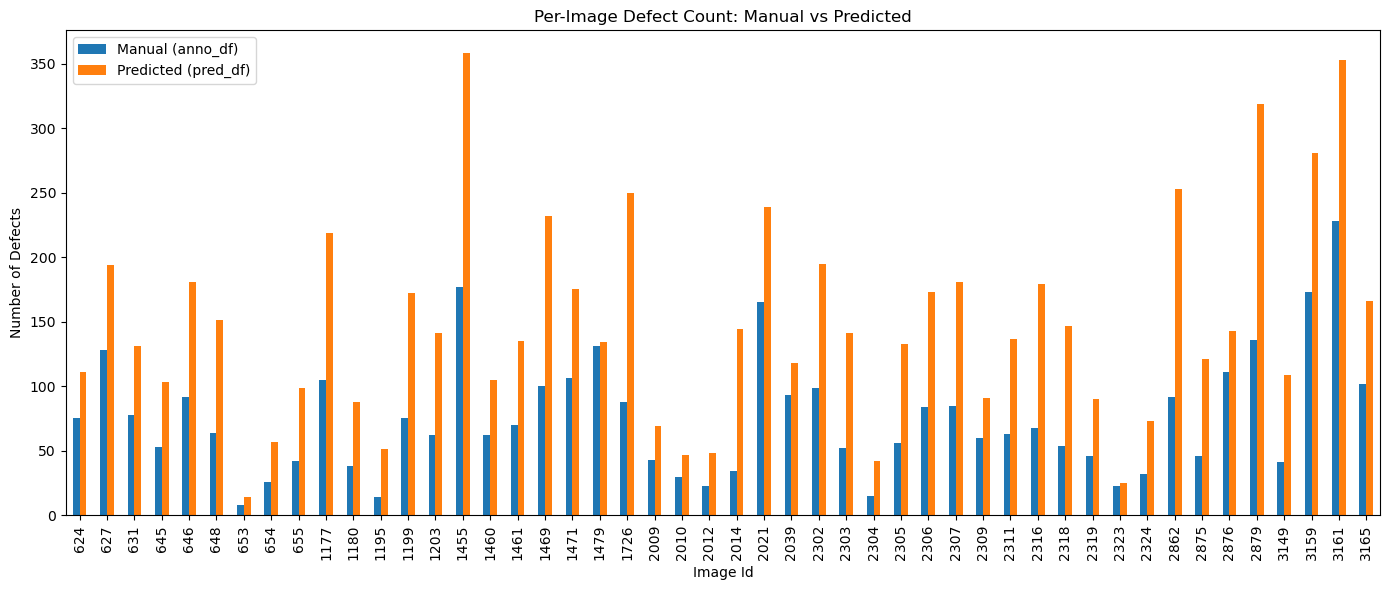

In [21]:
# Count defects per image for both datasets
anno_counts = anno_df['image_id'].value_counts().sort_index()
pred_counts = pred_df['image_id'].value_counts().sort_index()

# Combine into a DataFrame for grouped bar chart
counts_df = pd.DataFrame({
    'Manual (anno_df)': anno_counts,
    'Predicted (pred_df)': pred_counts
}).fillna(0).astype(int)

# Plot grouped bar chart
counts_df.plot(kind='bar', figsize=(14, 6))
plt.title('Per-Image Defect Count: Manual vs Predicted')
plt.xlabel('Image Id')
plt.ylabel('Number of Defects')
plt.legend()
plt.tight_layout()
plt.show()

The system predicted more defects than the manual annotation in all the images 